# Modified AlexNet Algorithm applied to the CIFAR10 Dataset
This is a convolutional neural network desgined to recognize the 10 classes of objects in the CIFAR10 dataset. The architecture for this algorithm was inspired by the AlexNet algorithm, the citation for which can be found at the end of this cell. 

The main difference between this algorithm and the algorithm in the AlexNet paper is the size of the algorithm. The convolutional layers in this program have half as many filters as AlexNet, and the dense layers have about a tenth of the nodes that the AlexNet algorithm does. 

The algorithm contained in this Notebook can achieve an accuracy of about 77% when run on the CIFAR10 dataset for 50 epochs. This is lower than the accuracy achieved for the original AlexNet algorithm because the researchers had the advantage of several GPUs, whereas this algorithm is being run on a single personal computer. 

Krizhevsky, Alex, et al. “ImageNet Classification with Deep Convolutional Neural Networks.” Communications of the ACM, vol. 60, no. 6, 2017, pp. 84–90., doi:10.1145/3065386. 

In [38]:
import random as rand
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Input, Dense, ReLU
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from sklearn.utils import shuffle

%matplotlib inline

# Preprocessing the Data
In this cell, the data is preprocessed. 

The CIFAR10 dataset is loaded, and then the images are mean centered and divided by the standard deviation.

The Y values are converted to one hot vectors using the 'to_categorical' function from TensorFlow.

The Y and X values are then shuffled, and three random images are displayed with their respective labels. 

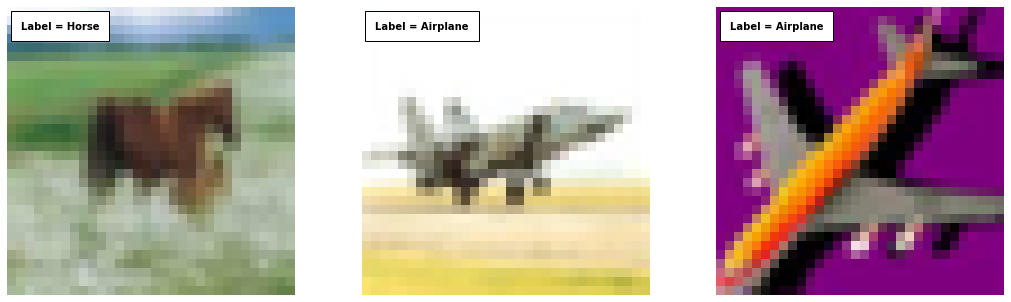

In [71]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_train_fitted = (x_train - x_train_mean)/(x_train_std + 1e-10)
x_test_fitted = (x_test - x_train_mean)/(x_train_std + 1e-10)

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

x_train_shuffled, y_train_shuffled = shuffle(x_train_fitted, y_train_onehot)
x_test_shuffled, y_test_shuffled = shuffle(x_test_fitted, y_test_onehot)

labels = [ 'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

fig = plt.figure(figsize = (18, 18));
for i in range(3):
    m, _, _, _ = x_train.shape
    ind = rand.randint(0, m - 1)
    fig.add_subplot(3, 3, i + 1);
    plt.imshow(x_train[ind]);
    plt.axis('off');
    plt.text(1, 2, 'Label = {}'.format(labels[int(y_train[ind])]), 
                                       fontsize = 10, weight = 'bold', 
                                       bbox={'facecolor':'white', 'alpha':1, 'pad':10})

# Creating the Model
In this cell, the model is created and trained. 

The model is a Sequential Tensorflow API. It is eight layers, with five convolutional layers and three dense layers. Batch normalization and max pooling are including in the first two convolutional layers. This architecture is loosely based on the AlexNet algorithm.

The model uses a stochastic gradient descent optimizer, with a categorical crossentropy loss function. 

The model was trained for 50 epochs.

In [75]:
model = Sequential([
    
    Input(shape = (32, 32, 3)),
    
    Conv2D(filters = 48, kernel_size = 11, activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D(pool_size = 3, strides = 2, padding = 'valid'),
    
    Conv2D(filters = 128, kernel_size = 5, activation = 'relu', padding = 'same'),
    BatchNormalization(),
    MaxPooling2D(pool_size = 3, strides = 2, padding = 'valid'),
    
    Conv2D(filters = 192, kernel_size = 3, activation = 'relu', padding = 'same'),
    
    Conv2D(filters = 192, kernel_size = 3, activation = 'relu', padding = 'same'),
    
    Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
    Flatten(),
    
    Dense(408, activation = 'relu'),
    Dropout(0.5),
    
    Dense(408, activation = 'relu'),
    Dropout(0.5),
    
    Dense(10, activation = 'softmax'),
    
    ])

model.compile(
    
    optimizer = SGD(learning_rate = 0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    
    )

model.fit(x_train_shuffled, y_train_shuffled, validation_data = (x_test_shuffled, y_test_shuffled), epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 199s 127ms/step - loss: 2.0120 - accuracy: 0.2540 - val_loss: 1.6217 - val_accuracy: 0.4209
Epoch 2/50
1563/1563 [==============================] - 218s 140ms/step - loss: 1.6965 - accuracy: 0.3747 - val_loss: 1.4417 - val_accuracy: 0.4832
Epoch 3/50
1563/1563 [==============================] - 217s 139ms/step - loss: 1.5458 - accuracy: 0.4349 - val_loss: 1.3251 - val_accuracy: 0.5225
Epoch 4/50
1563/1563 [==============================] - 201s 128ms/step - loss: 1.4156 - accuracy: 0.4890 - val_loss: 1.3014 - val_accuracy: 0.5312
Epoch 5/50
1563/1563 [==============================] - 222s 142ms/step - loss: 1.3232 - accuracy: 0.5264 - val_loss: 1.1492 - val_accuracy: 0.5886
Epoch 6/50
1563/1563 [==============================] - 214s 137ms/step - loss: 1.2505 - accuracy: 0.5555 - val_loss: 1.1399 - val_accuracy: 0.5903
Epoch 7/50
1563/1563 [==============================] - 218s 140ms/step - loss: 1.1837 - accuracy: 0.5803 - val_

# Testing the Model
In this cell, the model was tested on data prepared previously. 

The accuracy on the test set is printed below. 

In [77]:
_, acc = model.evaluate(x_test_shuffled, y_test_shuffled)
print('Accuracy on test set:', np.round(acc*100, 3))

313/313 [==============================] - 8s 26ms/step - loss: 0.8639 - accuracy: 0.7689
Accuracy on test set: 76.89


# Plotting the Predictions

In this cell, nine of the images from the test set are randomly selected.

The images are displayed with the true label, the predicted label, and the confidence the network had in its prediction.

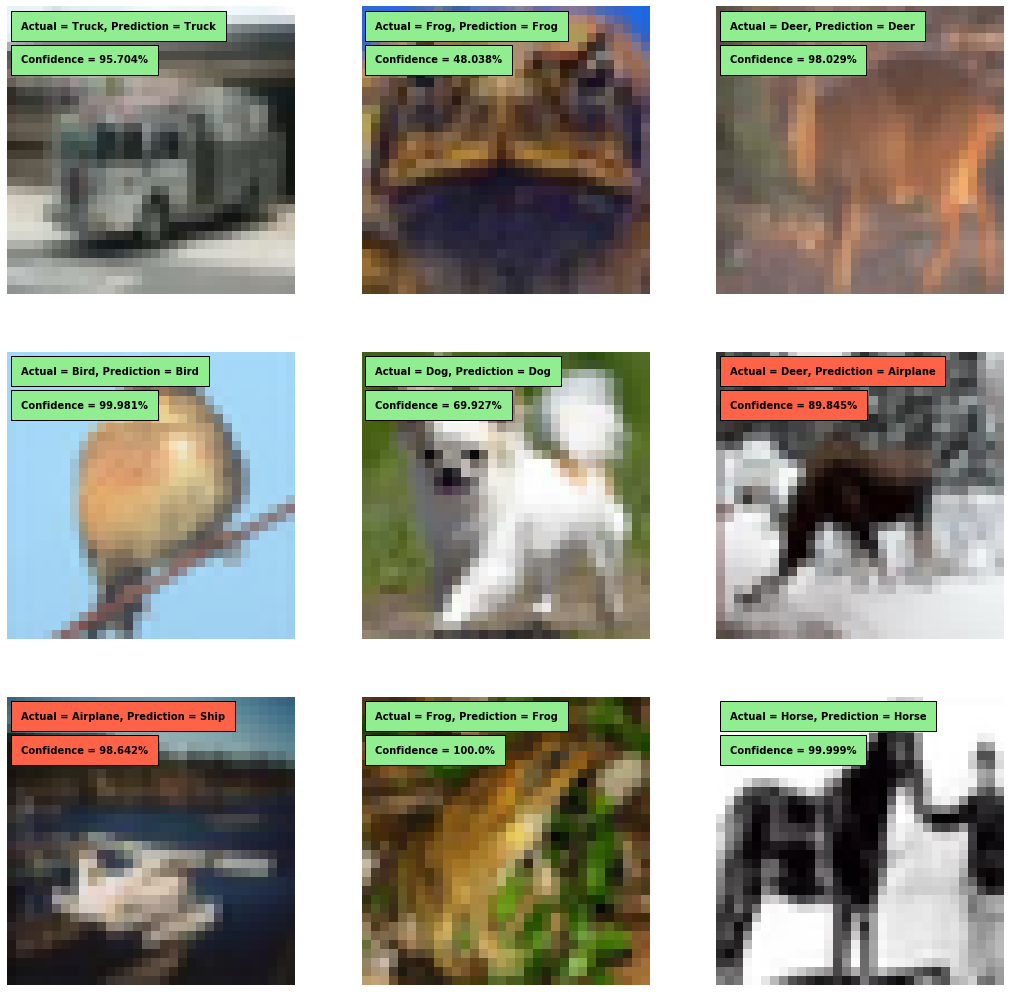

In [97]:
y_pred = model.predict(x_test_fitted)

fig = plt.figure(figsize = (18, 18));
for i in range(9):
    m, _, _, _ = x_test.shape
    ind = rand.randint(0, m - 1)
    
    if np.argmax(y_test_onehot[ind]) == np.argmax(y_pred[ind]):
        c = 'lightgreen'
    else:
        c = 'tomato'
    
    fig.add_subplot(3, 3, i + 1);
    plt.imshow(x_test[ind]);
    plt.axis('off');
    
    plt.text(1, 2, 'Actual = {}, Prediction = {}'.format( labels[np.argmax(y_test_onehot[ind])],
                labels[np.argmax(y_pred[ind])]), fontsize = 10, weight = 'bold', 
                  bbox={'facecolor':c, 'alpha':1, 'pad':10});
    
    plt.text(1, 5.75, 'Confidence = {}%'.format( np.round( np.max(y_pred[ind])*100, 3 ) ), 
             fontsize = 10, weight = 'bold', 
                  bbox={'facecolor':c, 'alpha':1, 'pad':10});